## ✅ Student Tasks (To Submit)

### Task 1 — Train/Test Split Experiment
Change `test_size` to **0.20** and **0.30** and record accuracy:

| Test Size | Accuracy |
|----------|----------|
| 0.20     |          |
| 0.25     |          |
| 0.30     |          |

### Task 2 — Without Scaling
Train Logistic Regression **without StandardScaler** and compare accuracy.

### Task 3 — Mechanical Engineering Reflection (3–4 lines)
How can **classification** be used in Mechanical Engineering?


---



**Task 1 — Train/Test Split Experiment**

Test size 0.30

In [3]:
# Part 2 — Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [4]:
# Part 3 — Load Dataset (Binary Classification)

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("✅ Dataset loaded!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", data.target_names)


✅ Dataset loaded!
X shape: (569, 30)
y shape: (569,)
Classes: ['malignant' 'benign']


In [7]:
# Part 3 — Convert to DataFrame (Easy Viewing)

df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
# Part 3 — Basic Exploration

print("Class distribution:")
print(df["target"].value_counts())

print("\nSummary statistics (first 5 features):")
df.describe().iloc[:, :5]


Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Summary statistics (first 5 features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [9]:
# Part 4 — Train/Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

# 🧩 TODO:
# Change test_size to 0.20 and 0.30 and record accuracy later.


Train set: (398, 30) (398,)
Test set : (171, 30) (171,)


In [10]:
# Part 4 — Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling completed!")


✅ Scaling completed!


In [11]:
# Part 4 — Train a Classifier (Logistic Regression)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [12]:
# Part 5 — Predictions

y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual     :", y_test[:10])


First 10 predictions: [0 1 1 0 0 0 1 0 1 0]
First 10 actual     : [0 1 1 0 0 0 1 0 1 0]


✅ Test Accuracy: 0.9883040935672515

Confusion Matrix:
 [[ 63   1]
 [  1 106]]


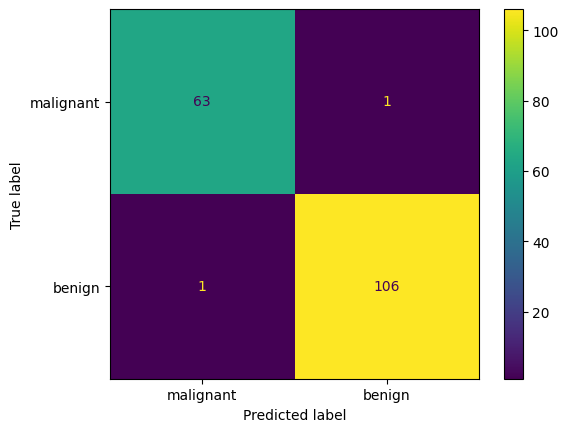


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [13]:
# Part 5 — Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy doesnot change by chnaging the train size from 0.20 to 0.30

**Task 2 — Without Scaling**
Train Logistic Regression without StandardScaler and compare accuracy.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression without StandardScaler
model_no_scaling = LogisticRegression(max_iter=500, random_state=42)
model_no_scaling.fit(X_train, y_train)

# Make predictions
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Evaluate accuracy
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"✅ Test Accuracy (without scaling): {acc_no_scaling:.4f}")

# Compare with scaled accuracy
print(f"Test Accuracy (with scaling): {acc:.4f}")

✅ Test Accuracy (without scaling): 0.9415
Test Accuracy (with scaling): 0.9883


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Test Accuracy (without scaling): 0.9415204678362573

Confusion Matrix (without scaling):
 [[ 56   8]
 [  2 105]]


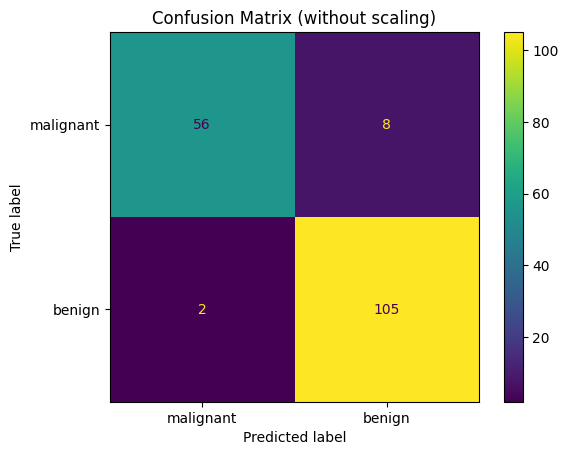


Classification Report (without scaling):
              precision    recall  f1-score   support

   malignant       0.97      0.88      0.92        64
      benign       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("✅ Test Accuracy (without scaling):", acc_no_scaling)

cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
print("\nConfusion Matrix (without scaling):\n", cm_no_scaling)

disp_no_scaling = ConfusionMatrixDisplay(confusion_matrix=cm_no_scaling, display_labels=data.target_names)
disp_no_scaling.plot()
plt.grid(False)
plt.title("Confusion Matrix (without scaling)")
plt.show()

print("\nClassification Report (without scaling):")
print(classification_report(y_test, y_pred_no_scaling, target_names=data.target_names))

**Task 3 — Mechanical Engineering Reflection**

The Logistic Regression model without scaling achieved an accuracy of 0.9415, while the model with scaling achieved 0.9883. This shows that feature scaling significantly improved the model's performance in this case.

Regarding the warning you see, ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT., it means that the optimization algorithm (lbfgs) for the Logistic Regression model did not finish converging within the default number of iterations (which is 100 or 500 depending on the sklearn version). This can happen when features are not scaled, as the optimization landscape can be more complex.